In [1]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
 
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1) 
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
  
    def forward(self, x):
    
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x


In [2]:
import torch 
import xlrd
from sklearn.preprocessing import StandardScaler
import numpy as np

N, D_in, H1, H2, D_out = 50, 5, 20, 12, 3
model = Net(D_in, H1, H2, D_out)

model.load_state_dict(torch.load("C:/Users/Gabriel/Documents/Python/ANN2.pt"))
model.eval()
book = xlrd.open_workbook('kinetic data for standardisation.xlsx')
sheet = book.sheet_by_name('Sheet1')
data4 = [[sheet.cell_value(r, c)
         for c in range(0,4)] for r in range(0,400)]
data5 = [[sheet.cell_value(r, c)
         for c in range(4,7)] for r in range(0,400)]
scaler = StandardScaler()
scaler2 = StandardScaler()


In [3]:



data = [[sheet.cell_value(r, c)
         for c in range(0,4)] for r in range(376,400)]
data2 = [[sheet.cell_value(r, c)
         for c in range(0,3)] for r in range(376,399)]
data3 = [[sheet.cell_value(r, c)
         for c in range(0,3)] for r in range(377,400)]
scaler = StandardScaler(with_mean=True, with_std=True)


scaler.fit(data4)
scaler2.fit(data5)
n = np.array(data)
q= torch.tensor(n[0:1,:])
standardised_data = scaler.transform(data)

standardised_data2 = standardised_data[:, 0:3] 



x = torch.tensor(standardised_data[0:1,:])
z = torch.tensor(standardised_data2[0:1,:])
v = torch.tensor(data3)

results=[]
for i in range(12):
     with torch.no_grad():
        dx_dt_pred = model(x.float())
     
        predictions= np.array(dx_dt_pred)
        descaled_predictions = scaler2.inverse_transform(predictions)
        usable_predictions = torch.tensor(descaled_predictions)
        q[:, 0:3]  = (usable_predictions*12) + q[:, 0:3]
        print(q[:, 0:3])
        np_x = np.array(q)
        results.append(np_x[:, 0:3])
        standardised_data3 = scaler.transform(np_x)
        x=torch.tensor(standardised_data3)
predictions_final=torch.tensor(results)  

x_plot=predictions_final.view(12, 3)
print(x_plot) 
     
        

print(v)




tensor([[3.7121e-01, 2.6700e+03, 6.1371e-01]], dtype=torch.float64)
tensor([[6.6882e-01, 2.6563e+03, 1.2325e+00]], dtype=torch.float64)
tensor([[9.6711e-01, 2.6665e+03, 1.8437e+00]], dtype=torch.float64)
tensor([[1.2594e+00, 2.7307e+03, 2.4167e+00]], dtype=torch.float64)
tensor([[1.5302e+00, 2.9959e+03, 2.8919e+00]], dtype=torch.float64)
tensor([[1.7686e+00, 3.8266e+03, 3.2691e+00]], dtype=torch.float64)
tensor([[1.9852e+00, 5.2728e+03, 3.6167e+00]], dtype=torch.float64)
tensor([[2.1901e+00, 6.9660e+03, 3.9486e+00]], dtype=torch.float64)
tensor([[2.3851e+00, 8.7225e+03, 4.2616e+00]], dtype=torch.float64)
tensor([[2.5689e+00, 1.0492e+04, 4.5527e+00]], dtype=torch.float64)
tensor([[2.7408e+00, 1.2260e+04, 4.8205e+00]], dtype=torch.float64)
tensor([[2.9012e+00, 1.4020e+04, 5.0660e+00]], dtype=torch.float64)
tensor([[3.7121e-01, 2.6700e+03, 6.1371e-01],
        [6.6882e-01, 2.6563e+03, 1.2325e+00],
        [9.6711e-01, 2.6665e+03, 1.8437e+00],
        [1.2594e+00, 2.7307e+03, 2.4167e+00],


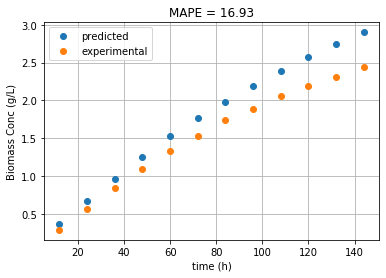

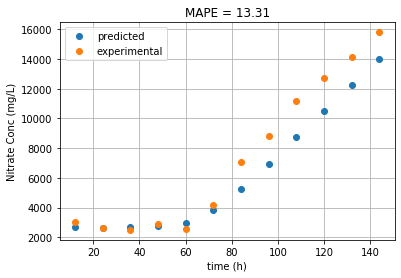

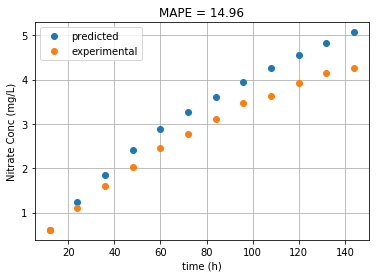

In [9]:
def MAPE(y_true, y_pred):
    MAPE_Total=0
    for i in range(len(y_pred)):
        MAPE = torch.abs((y_true[i:1+i,:]-y_pred[i:1+i,:])/y_true[i:1+i,:])
        MAPE_Total += (MAPE/len(y_pred))*100
    return MAPE_Total

import numpy as np
a = np.linspace(12,144,12)
v = torch.tensor(data3)
import matplotlib.pyplot as plt 
y1 = x_plot[:, 0:1] 
x1 = a
plt.plot(x1, y1,'o' ,label = "predicted") 

y2 = v[:, 0:1] 
x2 = a
plt.plot(x2, y2, 'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Biomass Conc (g/L)')
loss = MAPE(v[:, 0:1],x_plot[:, 0:1])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 


y1 = x_plot[:, 1:2] 
x1 = a
plt.plot(x1, y1,'o',label = "predicted") 

y2 = v[:, 1:2] 
x2 = a
plt.plot(x2, y2,'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Nitrate Conc (mg/L)')
loss = MAPE(v[:, 1:2],x_plot[:, 1:2])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 

y1 = x_plot[:, 2:3] 
x1 = a
plt.plot(x1, y1,'o',label = "predicted") 

y2 = v[:, 2:3] 
x2 = a
plt.plot(x2, y2,'o',label = "experimental") 
plt.xlabel('time (h)')
plt.ylabel('Nitrate Conc (mg/L)')
loss = MAPE(v[:, 2:3],x_plot[:, 2:3])
plt.title(('MAPE = {:.2f}'.format(loss.item())))
plt.grid(b=True,which='major', axis='both')
plt.legend()
plt.show() 


In [6]:
import pandas as pd
b=np.array(v)
c=np.array(x_pred)
book = xlrd.open_workbook('tested data.xlsx')
sheet = book.sheet_by_name('Sheet1')
writer = pd.ExcelWriter('tested data.xlsx', engine='xlsxwriter')
df1 = pd.DataFrame(b)
df1.to_excel(writer, header=True, index=True)
df2 = pd.DataFrame(c)
df2.to_excel(writer, startrow=13, header=True, index=True)
writer.save()

NameError: name 'x_pred' is not defined